In [1]:
#import libraries
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
import pandas as pd
import itertools
import keras

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [2]:
#load data
X = pickle.load(open("input_6_X.pickle", "rb"))
y = pickle.load(open("input_6_y.pickle", "rb"))

In [3]:
#split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
#normalise data
X_train /= 255.0
X_test /= 255.0

In [6]:
#batch_size to train
batch_size = 16
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 20

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [7]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
#configure model
model = Sequential()

model.add(Conv2D(nb_filters, nb_conv, nb_conv,
                        input_shape=X.shape[1:]))
convout1 = Activation('relu')
model.add(convout1)
model.add(Conv2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [9]:
#train model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=270,
                verbose=1, validation_data=(X_test, Y_test))

2021-08-24 18:24:14.743319: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/270
328/328 [==============================] - 28s 83ms/step - loss: 0.8190 - accuracy: 0.5903 - val_loss: 0.5832 - val_accuracy: 0.7046
Epoch 2/270
328/328 [==============================] - 25s 76ms/step - loss: 0.5747 - accuracy: 0.7185 - val_loss: 0.4654 - val_accuracy: 0.7916
Epoch 3/270
328/328 [==============================] - 25s 75ms/step - loss: 0.4730 - accuracy: 0.7786 - val_loss: 0.3973 - val_accuracy: 0.8397
Epoch 4/270
328/328 [==============================] - 23s 72ms/step - loss: 0.4001 - accuracy: 0.8250 - val_loss: 0.3749 - val_accuracy: 0.8336
Epoch 5/270
328/328 [==============================] - 24s 73ms/step - loss: 0.3584 - accuracy: 0.8481 - val_loss: 0.3197 - val_accuracy: 0.8740
Epoch 6/270
328/328 [==============================] - 24s 74ms/step - loss: 0.3367 - accuracy: 0.8527 - val_loss: 0.2887 - val_accuracy: 0.8817
Epoch 7/270
328/328 [==============================] - 24s 72ms/step - loss: 0.3141 - accuracy: 0.8651 - val_loss: 0.2901 - val_ac

328/328 [==============================] - 23s 71ms/step - loss: 0.0616 - accuracy: 0.9773 - val_loss: 0.0946 - val_accuracy: 0.9534
Epoch 58/270
328/328 [==============================] - 23s 71ms/step - loss: 0.0628 - accuracy: 0.9771 - val_loss: 0.1048 - val_accuracy: 0.9504
Epoch 59/270
328/328 [==============================] - 24s 72ms/step - loss: 0.0622 - accuracy: 0.9769 - val_loss: 0.0871 - val_accuracy: 0.9626
Epoch 60/270
328/328 [==============================] - 24s 75ms/step - loss: 0.0563 - accuracy: 0.9794 - val_loss: 0.0827 - val_accuracy: 0.9565
Epoch 61/270
328/328 [==============================] - 24s 72ms/step - loss: 0.0535 - accuracy: 0.9811 - val_loss: 0.0789 - val_accuracy: 0.9634
Epoch 62/270
328/328 [==============================] - 24s 72ms/step - loss: 0.0615 - accuracy: 0.9779 - val_loss: 0.0893 - val_accuracy: 0.9656
Epoch 63/270
328/328 [==============================] - 24s 72ms/step - loss: 0.0547 - accuracy: 0.9800 - val_loss: 0.0768 - val_accuracy

328/328 [==============================] - 24s 72ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0593 - val_accuracy: 0.9748
Epoch 114/270
328/328 [==============================] - 24s 72ms/step - loss: 0.0263 - accuracy: 0.9935 - val_loss: 0.0538 - val_accuracy: 0.9794
Epoch 115/270
328/328 [==============================] - 23s 71ms/step - loss: 0.0224 - accuracy: 0.9937 - val_loss: 0.0970 - val_accuracy: 0.9573
Epoch 116/270
328/328 [==============================] - 25s 77ms/step - loss: 0.0252 - accuracy: 0.9914 - val_loss: 0.0601 - val_accuracy: 0.9733
Epoch 117/270
328/328 [==============================] - 24s 74ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0584 - val_accuracy: 0.9786
Epoch 118/270
328/328 [==============================] - 24s 72ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0666 - val_accuracy: 0.9725
Epoch 119/270
328/328 [==============================] - 24s 72ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0557 - val_ac

328/328 [==============================] - 24s 74ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0433 - val_accuracy: 0.9840
Epoch 169/270
328/328 [==============================] - 25s 77ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0360 - val_accuracy: 0.9870
Epoch 170/270
328/328 [==============================] - 24s 74ms/step - loss: 0.0095 - accuracy: 0.9964 - val_loss: 0.0439 - val_accuracy: 0.9809
Epoch 171/270
328/328 [==============================] - 24s 73ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0402 - val_accuracy: 0.9817
Epoch 172/270
328/328 [==============================] - 25s 75ms/step - loss: 0.0107 - accuracy: 0.9962 - val_loss: 0.0881 - val_accuracy: 0.9718
Epoch 173/270
328/328 [==============================] - 25s 77ms/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.0498 - val_accuracy: 0.9809
Epoch 174/270
328/328 [==============================] - 25s 75ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.0565 - val_ac

Epoch 224/270
328/328 [==============================] - 23s 70ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0347 - val_accuracy: 0.9847
Epoch 225/270
328/328 [==============================] - 25s 77ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0365 - val_accuracy: 0.9840
Epoch 226/270
328/328 [==============================] - 24s 73ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0305 - val_accuracy: 0.9885
Epoch 227/270
328/328 [==============================] - 23s 70ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0324 - val_accuracy: 0.9878
Epoch 228/270
328/328 [==============================] - 23s 71ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 0.0501 - val_accuracy: 0.9817
Epoch 229/270
328/328 [==============================] - 24s 74ms/step - loss: 0.0122 - accuracy: 0.9952 - val_loss: 0.0374 - val_accuracy: 0.9870
Epoch 230/270
328/328 [==============================] - 24s 72ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0

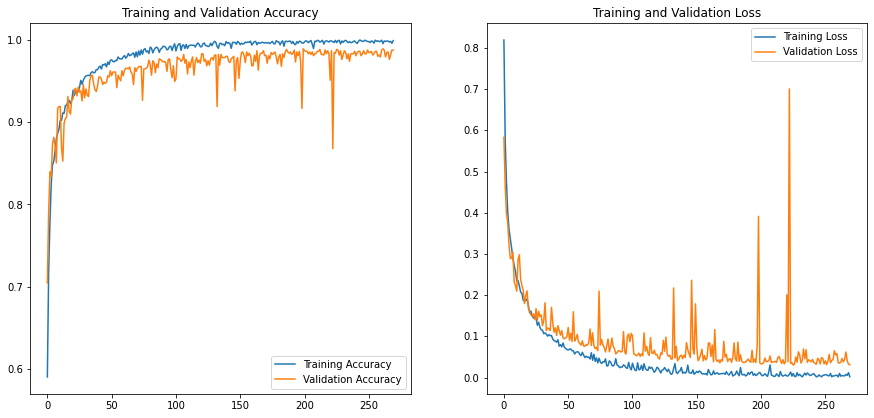

In [10]:
#plot output
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(270)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
#model score
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03134315460920334
Test accuracy: 0.9877862334251404


In [12]:
#print classification report
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=1)
print(classification_report(y_test,predictions,target_names = ['cyanobacteria','diatom','green']))

               precision    recall  f1-score   support

cyanobacteria       0.99      0.97      0.98       437
       diatom       0.98      0.99      0.98       459
        green       1.00      1.00      1.00       414

     accuracy                           0.99      1310
    macro avg       0.99      0.99      0.99      1310
 weighted avg       0.99      0.99      0.99      1310



In [13]:
#plot confusion matrix
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it’s categorical variable
categorical_test_labels = pd.DataFrame(y_test)
categorical_preds = pd.DataFrame(predictions)
confusion_matrix_test = confusion_matrix(categorical_test_labels, categorical_preds)

In [14]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes, normalize=False,title ='Confusion Matrix', cmap = plt.cm.Blues):
 
#Add Normalization Option - prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

Normalized confusion matrix


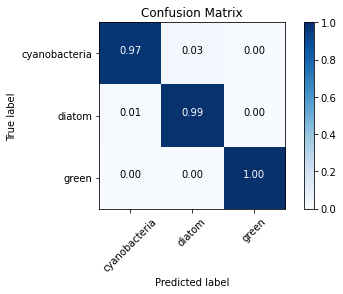

In [15]:
plot_confusion_matrix(confusion_matrix_test,['cyanobacteria','diatom','green'],normalize=True)

In [16]:
#validation / unseen data test
#load data
X_unseen = pickle.load(open("test_X.pickle", "rb"))
y_unseen = pickle.load(open("test_y.pickle", "rb"))

In [17]:
#normalise data
X_unseen = X_unseen.astype('float32')
X_unseen /= 255.0

In [18]:
#predictions and classification report
predictions_unseen = model.predict(X_unseen)
predictions_unseen = np.argmax(predictions_unseen,axis=1)
print(classification_report(y_unseen,predictions_unseen,target_names = ['cyanobacteria','diatom','green']))

               precision    recall  f1-score   support

cyanobacteria       0.35      0.30      0.32        40
       diatom       0.43      0.60      0.50        50
        green       1.00      0.53      0.70        30

     accuracy                           0.48       120
    macro avg       0.59      0.48      0.51       120
 weighted avg       0.55      0.48      0.49       120



In [19]:
#prepare confusion matrix for unseen data
categorical_test_labels_unseen = pd.DataFrame(y_unseen)
categorical_preds_unseen = pd.DataFrame(predictions_unseen)
confusion_matrix_unseen = confusion_matrix(categorical_test_labels_unseen, categorical_preds_unseen)

Normalized confusion matrix


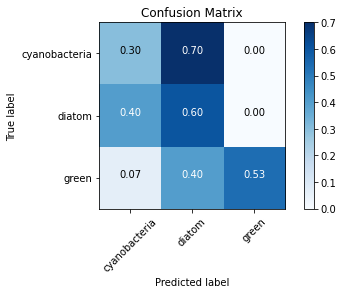

In [20]:
#plot confusion matrix
plot_confusion_matrix(confusion_matrix_unseen,['cyanobacteria','diatom','green'],normalize=True)